In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import joblib

In [6]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

df = pd.read_csv(path+"/creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df = df.sample(frac=1) #shuffles the data
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

new_df = pd.concat([fraud_df, non_fraud_df]).sample(frac = 1)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
167184,118532.0,-5.961457,5.313382,-6.674320,6.028975,-1.387560,0.670638,-4.128987,-4.765894,-1.005259,...,5.556642,-1.501808,1.355172,0.141093,0.077913,0.473988,0.287129,1.468653,105.89,1
183106,125658.0,0.224414,2.994499,-3.432458,3.986519,3.760233,0.165640,1.099378,-0.654557,-2.435416,...,0.491337,-0.984223,-0.421979,-1.048058,0.726412,0.268625,0.283689,0.419102,0.00,1
13752,24389.0,1.175086,0.374827,0.441817,0.729255,-0.044726,-0.228235,-0.183744,-0.001727,1.045087,...,-0.358759,-0.784422,0.157794,-0.081645,0.092800,0.068118,-0.036594,0.010783,0.99,0
127393,78315.0,1.018221,-0.060846,0.349765,1.264771,-0.028377,0.595302,-0.140440,0.319313,0.175788,...,-0.014718,0.076189,-0.058728,-0.304857,0.512772,-0.299942,0.040564,0.005470,38.64,0
249963,154657.0,-0.679521,4.672553,-6.814798,7.143500,0.928654,-1.873013,-2.306689,0.993702,-4.944054,...,0.566849,-0.321691,-0.281325,-1.120256,-0.073394,0.553530,0.760542,0.386742,0.77,1


/var/folders/9b/2jg7956d0fx4f6xfp3vwhtlw0000gn/T/ipykernel_74148/2691902304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = new_df , x = 'Class', palette = ['blue', 'red'])


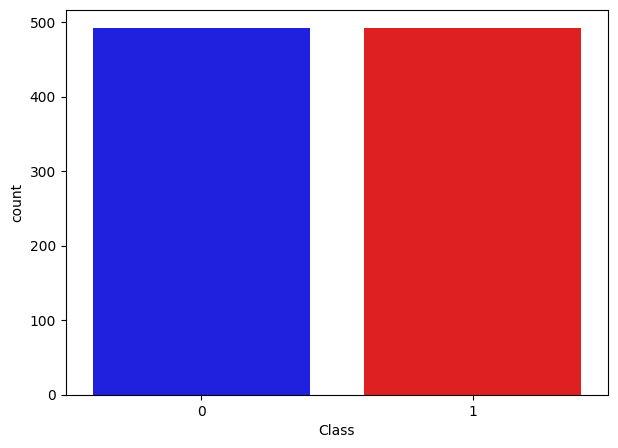

In [8]:
plt.figure(figsize = (7, 5))
sns.countplot(data = new_df , x = 'Class', palette = ['blue', 'red'])
plt.show()

/var/folders/9b/2jg7956d0fx4f6xfp3vwhtlw0000gn/T/ipykernel_74148/851264944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'Class', y = feature, palette='pastel')
/var/folders/9b/2jg7956d0fx4f6xfp3vwhtlw0000gn/T/ipykernel_74148/851264944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'Class', y = feature, palette='pastel')
/var/folders/9b/2jg7956d0fx4f6xfp3vwhtlw0000gn/T/ipykernel_74148/851264944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'Class', y = feature, palette='pastel')
/var/fo

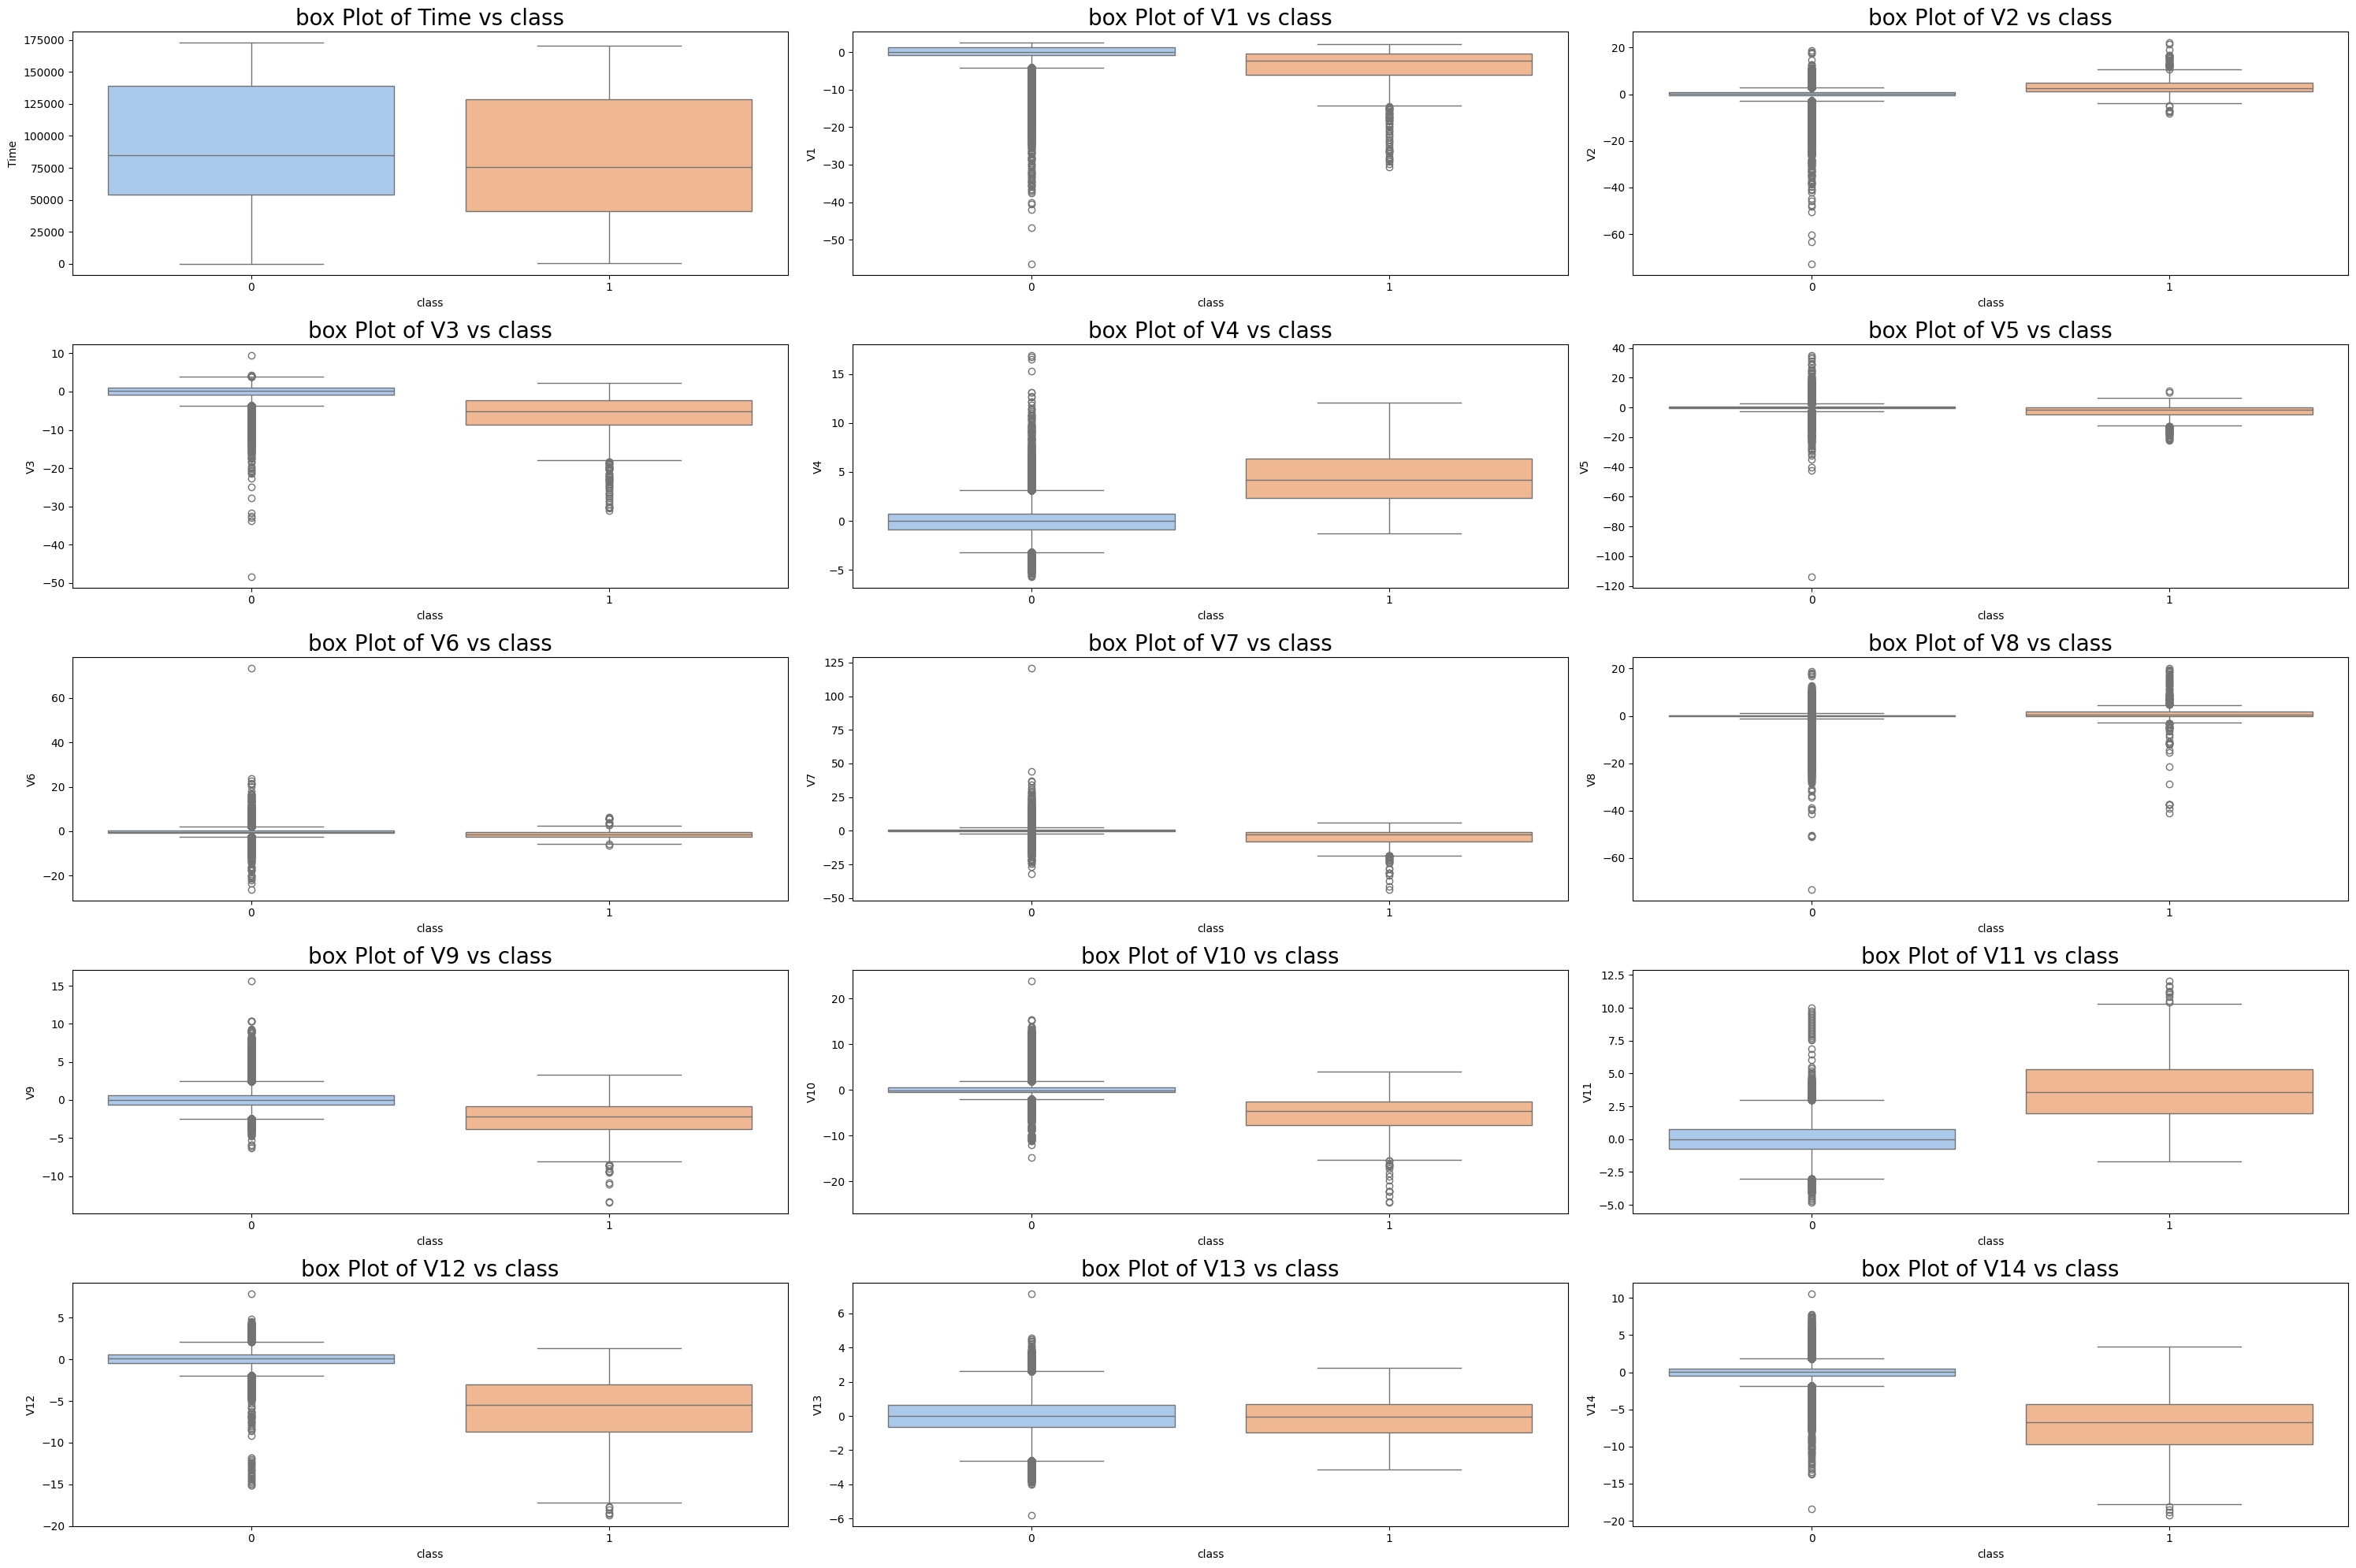

In [9]:
x = new_df.drop(columns = 'Class')
y = new_df['Class']

plt.figure(figsize=(30, 20))

for i, feature in enumerate(x.columns[:15]):
    plt.subplot(5, 3, i + 1)  # 2 rows, 3 columns
    sns.boxplot(data=df, x = 'Class', y = feature, palette='pastel')
    plt.title(f"box Plot of {feature} vs class", fontsize = 20)
    plt.xlabel('class')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

/var/folders/9b/2jg7956d0fx4f6xfp3vwhtlw0000gn/T/ipykernel_74148/578991819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'Class', y = feature, palette='pastel')
/var/folders/9b/2jg7956d0fx4f6xfp3vwhtlw0000gn/T/ipykernel_74148/578991819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'Class', y = feature, palette='pastel')
/var/folders/9b/2jg7956d0fx4f6xfp3vwhtlw0000gn/T/ipykernel_74148/578991819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'Class', y = feature, palette='pastel')
/var/fo

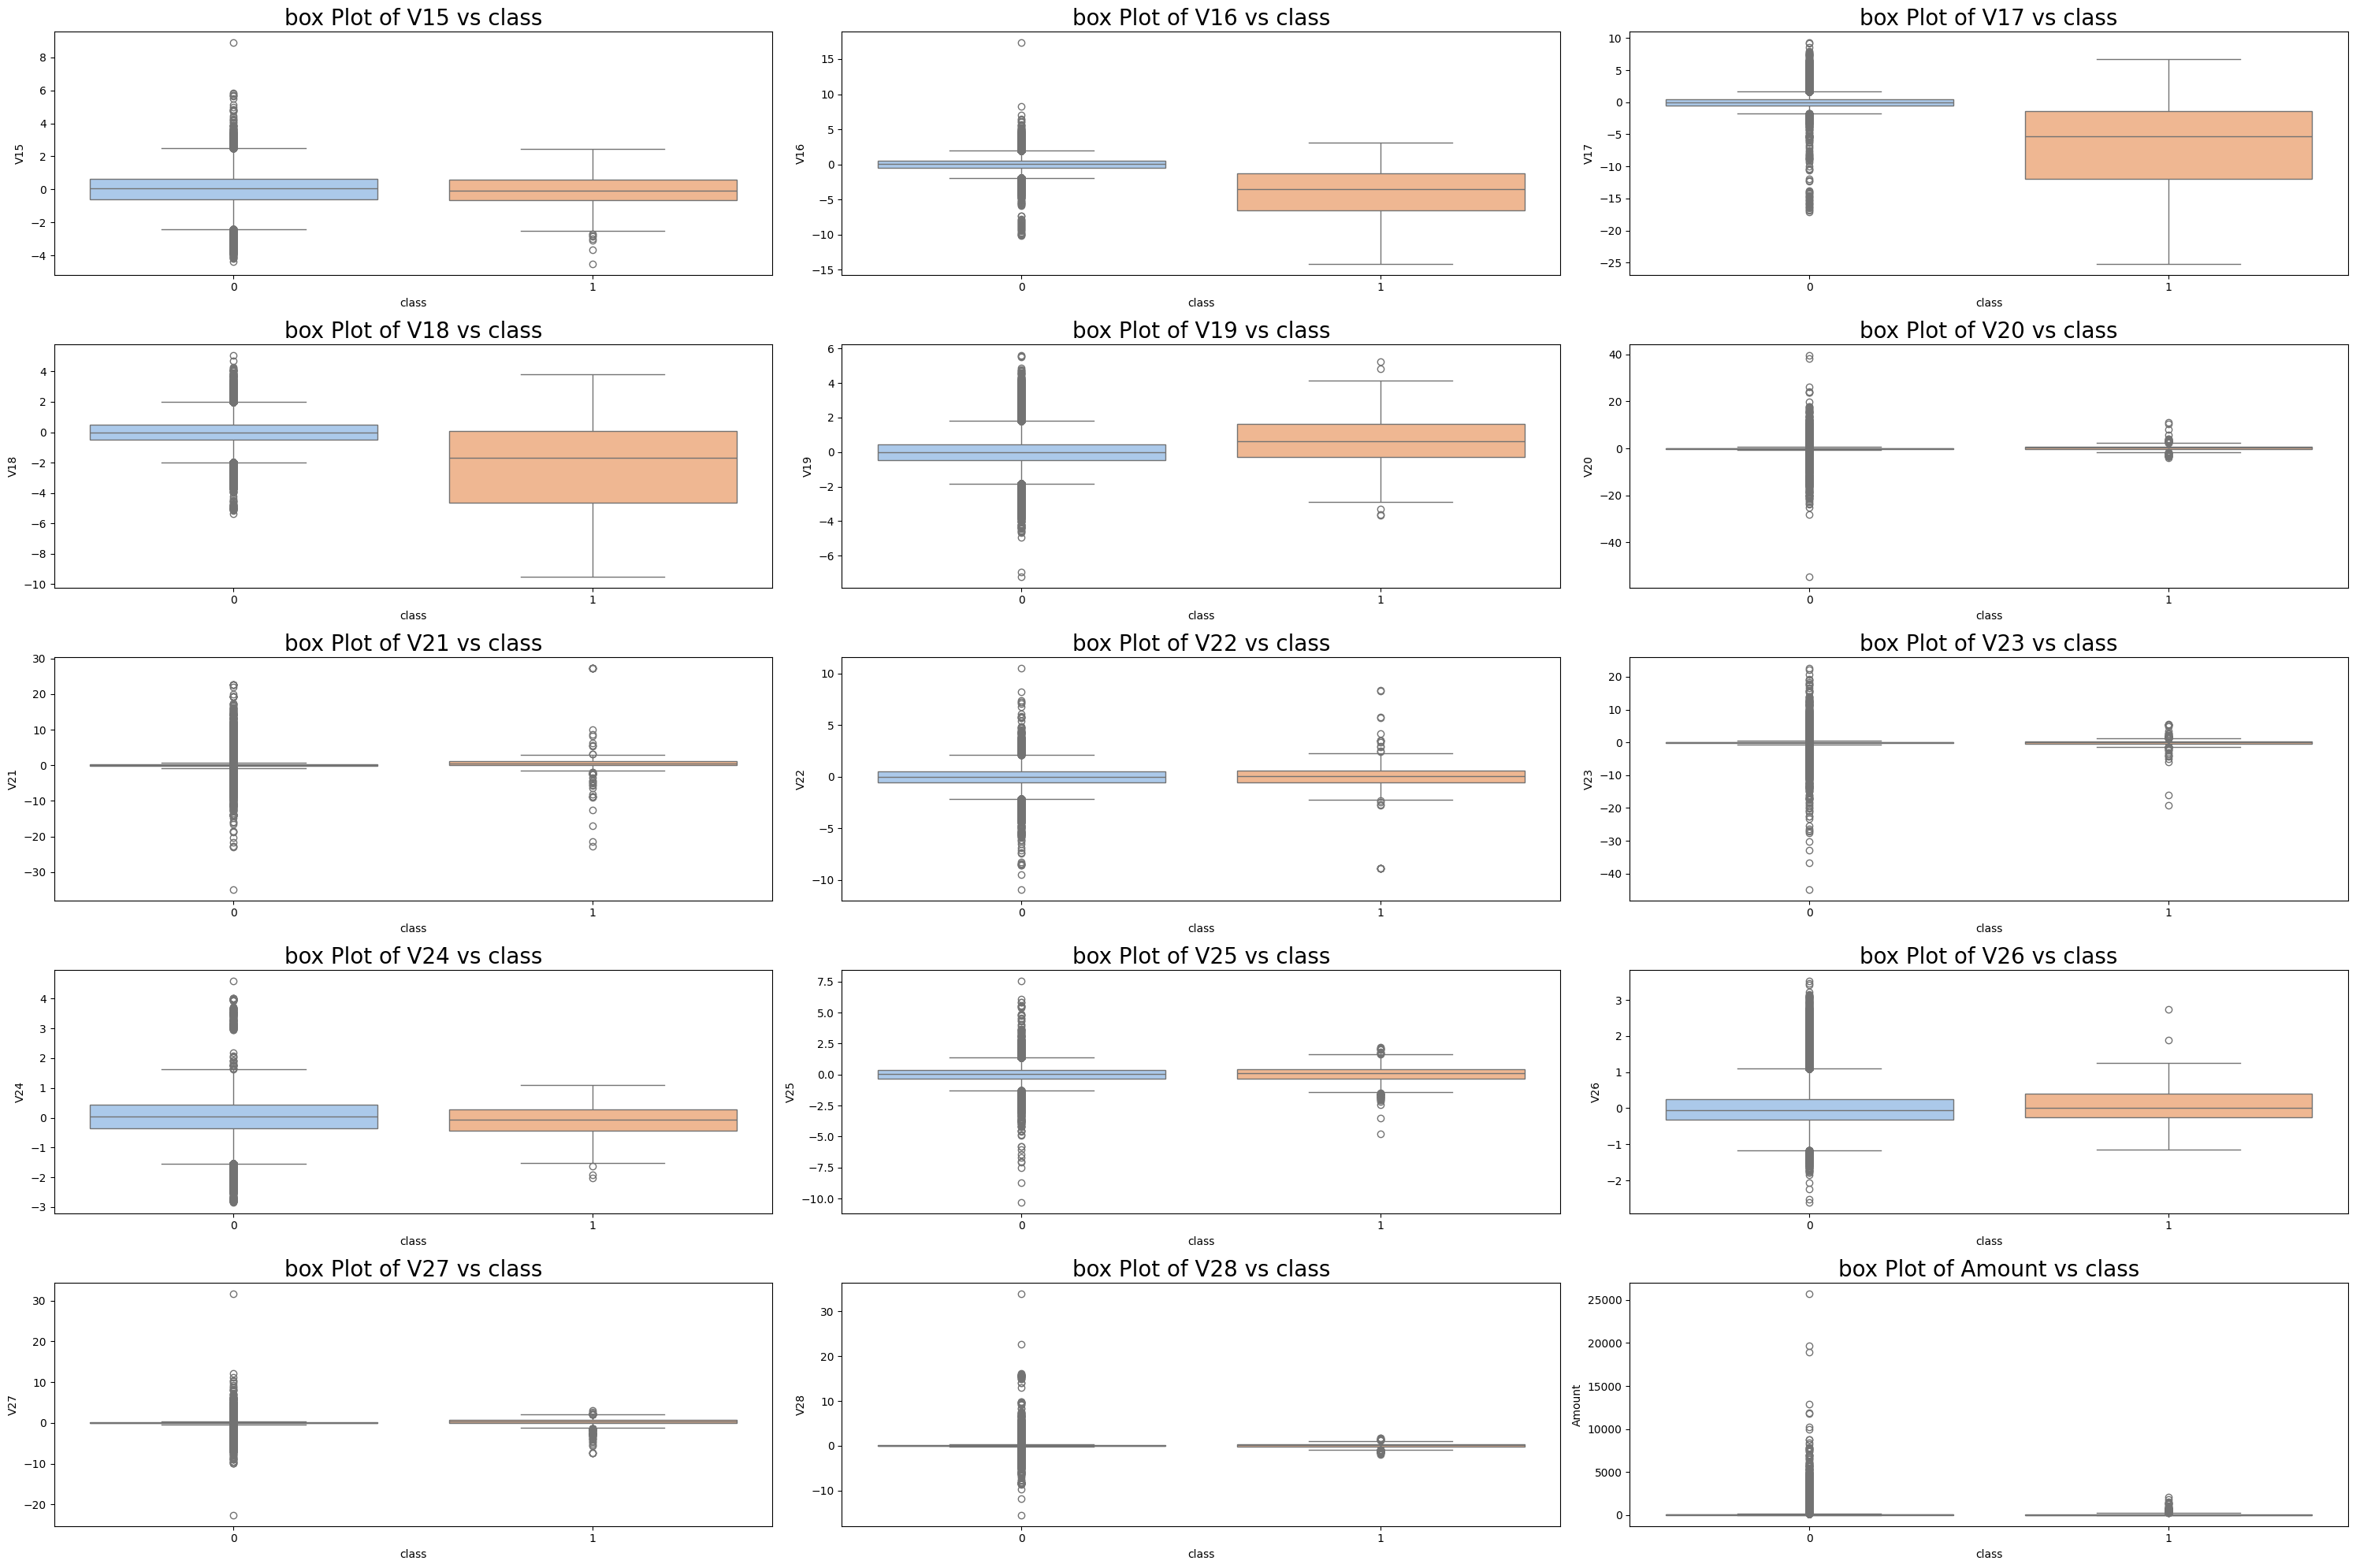

In [10]:
plt.figure(figsize=(30, 20))

for i, feature in enumerate(x.columns[15:30]):
    plt.subplot(5, 3, i + 1)  # 2 rows, 3 columns
    sns.boxplot(data=df, x = 'Class', y = feature, palette='pastel')
    plt.title(f"box Plot of {feature} vs class", fontsize = 20)
    plt.xlabel('class')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [11]:
def remove_outlier(df , column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    upper_limit = (IQR*3) + Q3 # multiply by 3 to remove extreme outliers only
    lower_limit = Q1 - (IQR*3)
    
    df_filtered = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df_filtered

In [12]:
df_filtered = new_df.copy()
for col in new_df.columns:
    df_filtered = remove_outlier(df_filtered, col) 

print(df_filtered['V20'].value_counts().sum())
print(new_df['V20'].value_counts().sum())

642
984


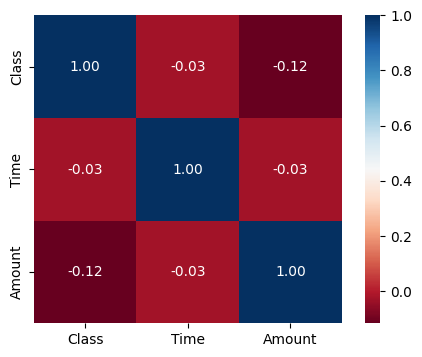

In [13]:
corr = df_filtered.corr()
cols = ['Class', 'Time', 'Amount']
cm = corr.loc[cols, cols]

plt.figure(figsize = (6 , 4))

sns.heatmap(cm, cbar = True , annot = True , cmap = 'RdBu', fmt = '.2f', square = True)

plt.show()

In [14]:
df_filtered.drop(columns = 'Time', inplace = True)

df_filtered.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [15]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']
top_features = ['V17', 'V12', 'V14', 'V10', 'V11', 'V16']


In [16]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2018, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=2018, shuffle=True )

In [17]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [21]:
clf.fit(train_df[top_features], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [23]:
preds = clf.predict(valid_df[top_features])

In [24]:
roc_auc_score(valid_df[target].values, preds)

np.float64(0.8987012029351283)

In [25]:
joblib.dump(clf, "rf_model.joblib")

['rf_model.joblib']